In [39]:
library(repr)
library(feather)
library(tidyverse)
library(lubridate)
library(latex2exp) 
library(ggpubr)
library(padr)

options(scipen=99)

# this is important for the time zone not being mistakenly read in as PST
Sys.setenv(TZ='GMT')

options(warn=-1)

In [40]:
getwd()

[1] "/Users/shokawano/Box Sync/Zhang_Lab/code/sgp_analysis"

In [41]:
setwd('/Users/shokawano/Box Sync/Zhang_Lab/code/sgp_analysis/')

In [42]:
# takes in the year(str) and reads in the matrix data for that Year. 
read_mat_data  <- function (yr_str) {
    read_feather(paste0('data_processing/processed_data/matrix_data/treated/', yr_str,
                        '_Org_Mat.feather'))}


org_mx_list = c('2011', '2012', '2013', '2015', '2016', '2017')
org_mx_list = lapply(org_mx_list, read_mat_data)
org_mx_full = org_mx_list  %>% bind_rows()

# use this to load a single year of data 
# org_mx_full = read_mat_data('2011')
org_mx_full

utc,12,13,15,16,17,18,19,20,24,⋯,117,118,119,120,121,122,123,124,125,utc_6
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2011-01-01 00:00:00,-0.045000292,0.003963882,0.029324368,0.0014312831,0.0089455200,0.035782080,0.000042616452,0.000071564165,0.004728437867,⋯,-0.0099037308,0.0034983475,-0.006285537,-0.002107298,-0.0144802704,-0.0089360466,0.0131753124,-0.0169721507,-0.0186081771,2010-12-31 18:00:00
2011-01-01 00:30:00,0.023547199,-0.007283649,-0.008992027,0.0032015585,0.0200097375,0.080038950,0.000095326395,0.000160077921,0.004919728264,⋯,-0.0104844142,-0.0134518202,-0.003840966,-0.004350018,0.0002254796,-0.0117632616,-0.0014901083,0.0037942426,-0.0154556073,2010-12-31 18:30:00
2011-01-01 01:00:00,-0.019013142,-0.014083711,0.012948478,0.0029178401,0.0182365011,0.072946005,0.000086878688,0.000145892016,-0.005891003646,⋯,0.0051206662,0.0007809803,0.008738413,0.010515438,0.0111130411,0.0200603940,0.0121157616,0.0045216754,0.0138124740,2010-12-31 19:00:00
2011-01-01 01:30:00,-0.002936939,0.007491746,-0.007845521,0.0026176178,0.0163601134,0.065440454,0.000077939578,0.000130880886,0.004038454965,⋯,-0.0002538885,0.0090136593,-0.003149479,-0.003781060,0.0179466810,-0.0020080083,-0.0050666556,-0.0002111362,-0.0313303992,2010-12-31 19:30:00
2011-01-01 02:00:00,-0.021681869,0.044370521,0.055463132,0.0004191890,0.0026199312,0.010479725,0.000012481352,0.000020959449,0.001522551756,⋯,0.0262107104,-0.0174165480,-0.011070947,0.013975337,0.0081229303,-0.0014695801,0.0213945508,0.0066978638,0.0146200443,2010-12-31 20:00:00
2011-01-01 02:30:00,0.020968586,-0.004522848,-0.043172467,0.0017459961,0.0109124770,0.043649904,0.000051987037,0.000087299813,0.003147735493,⋯,-0.0080087613,-0.0097667221,0.008178644,-0.015222864,0.0103569292,-0.0041641826,-0.0033215135,-0.0009133962,-0.0072153308,2010-12-31 20:30:00
2011-01-01 03:00:00,-0.028351752,0.008107421,0.018906793,0.0025236888,0.0157730561,0.063092224,0.000075142845,0.000126184459,0.004556099419,⋯,0.0184859205,-0.0051812758,0.004216681,-0.007532388,-0.0096974289,-0.0040199542,0.0137159778,-0.0088787433,-0.0002172647,2010-12-31 21:00:00
2011-01-01 03:30:00,-0.023904087,0.051829051,0.020845700,0.0024773148,0.0154832192,0.061932877,0.000073762050,0.000123865742,0.008886864409,⋯,0.0121584013,-0.0039117211,0.002611206,0.004719445,-0.0095023317,0.0020825050,0.0220453776,-0.0129216518,-0.0014511901,2010-12-31 21:30:00
2011-01-01 04:00:00,-0.030762173,0.022829264,-0.018769890,0.0033019839,0.0206374004,0.082549602,0.000098316581,0.000165099220,0.002201323165,⋯,0.0026367267,0.0008140316,-0.010188396,-0.013454072,-0.0020245726,0.0072179609,0.0183050185,0.0037452232,0.0023891849,2010-12-31 22:00:00


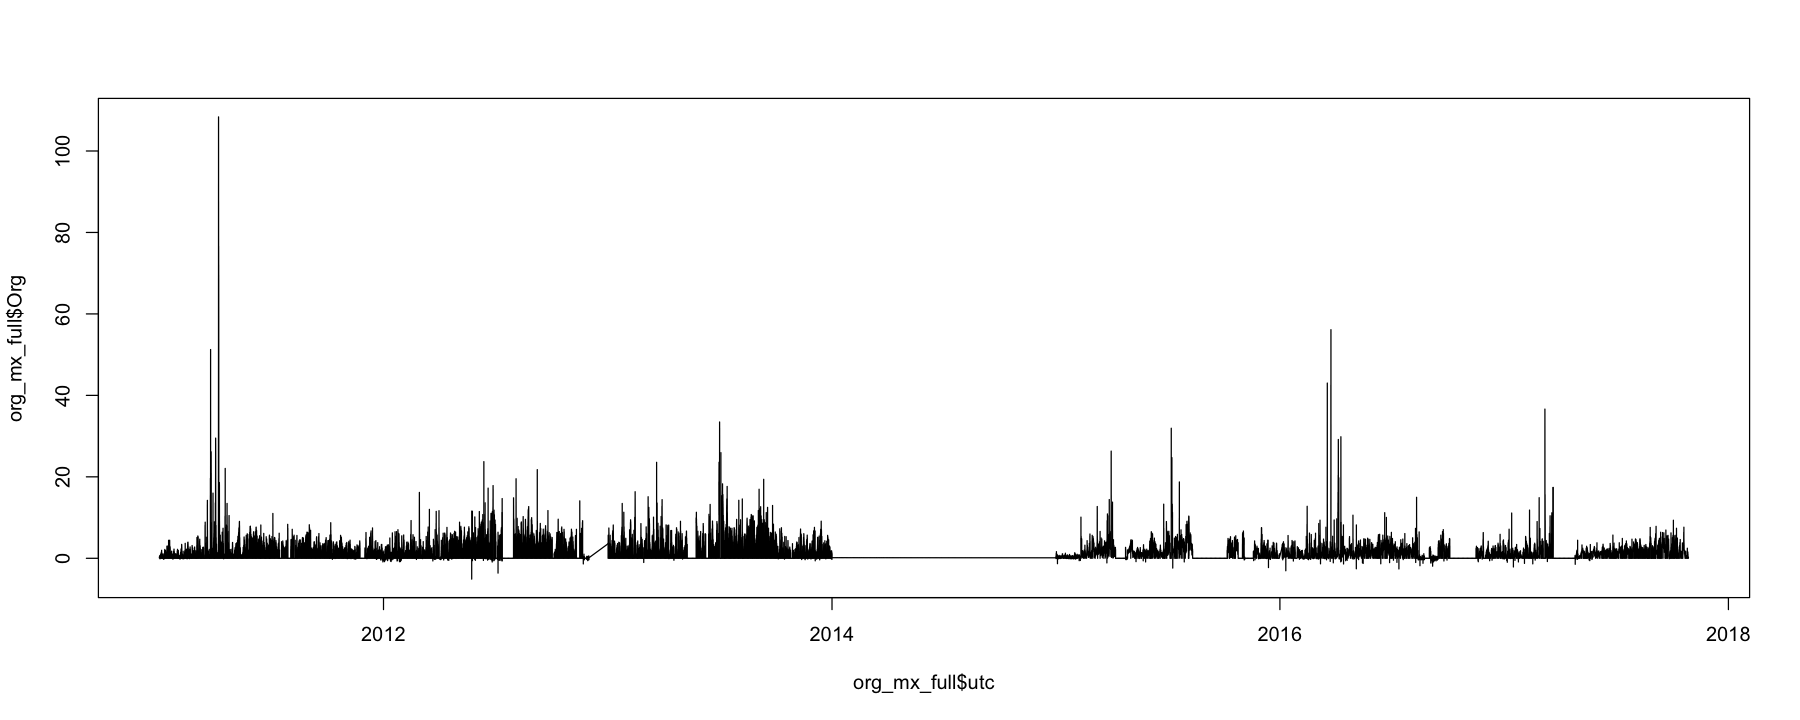

In [45]:
options(repr.plot.width=15, repr.plot.height=6)
org_mx_full$Org = org_mx_full %>% select(-utc, -utc_6)  %>% rowSums(na.rm=T)
plot(org_mx_full$utc, org_mx_full$Org, type = "l", lty = 1)

Only Select the columns we need for this plot. 

In [48]:
org_mx  = org_mx_full %>% select('43', '44', '60', 'utc', 'Org')
org_mx$mz43 = org_mx$'43'
org_mx$mz44 = org_mx$'44'
org_mx$mz60 = org_mx$'60'

org_mx = org_mx  %>% select(utc, mz43, mz44, mz60, Org)

org_mx  %>% head()

utc,mz43,mz44,mz60,Org
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
2011-01-01 00:00:00,0.004258275,0.03578208,-0.002475106,0.06065545
2011-01-01 00:30:00,0.008378787,0.08003895,-0.003092950,0.37209329
2011-01-01 01:00:00,0.001719999,0.07294600,-0.001169972,0.17196566
2011-01-01 01:30:00,0.019632295,0.06544045,0.002715671,0.19837956
2011-01-01 02:00:00,0.011747537,0.01047972,-0.001122824,0.31901011
2011-01-01 02:30:00,0.010443969,0.04364990,0.001387299,0.22979758


In [49]:
org_mx = org_mx  %>% 
    # add fXX variables 
    mutate(f43=mz43/Org, f44=mz44/Org, f60=mz60/Org)  %>% 
    # add Org_Loading Bins 
    mutate(Org_Loading=ifelse(Org>25, ">25", 
                           ifelse(Org>20, "(20, 25]", 
                                                 ifelse(Org>15, "(15, 20]", 
                                                       ifelse(Org>10, "(10, 15]", "(3-10]")))))  %>% 
    mutate(Org_Loading=factor(Org_Loading, levels=c("(3-10]", "(10, 15]", "(15, 20]", "(20, 25]", ">25")))  %>% 
    # add in the variable year 
    mutate(year=year(utc))
                        
org_mx  %>% head(3)

utc,mz43,mz44,mz60,Org,f43,f44,f60,Org_Loading,year
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
2011-01-01 00:00:00,0.004258275,0.03578208,-0.002475106,0.06065545,0.07020431,0.5899235,-0.040805987,(3-10],2011
2011-01-01 00:30:00,0.008378787,0.08003895,-0.003092950,0.37209329,0.02251797,0.2151045,-0.008312297,(3-10],2011
2011-01-01 01:00:00,0.001719999,0.07294600,-0.001169972,0.17196566,0.01000199,0.4241894,-0.006803522,(3-10],2011


In [126]:
options(repr.plot.width=6, repr.plot.height=6)

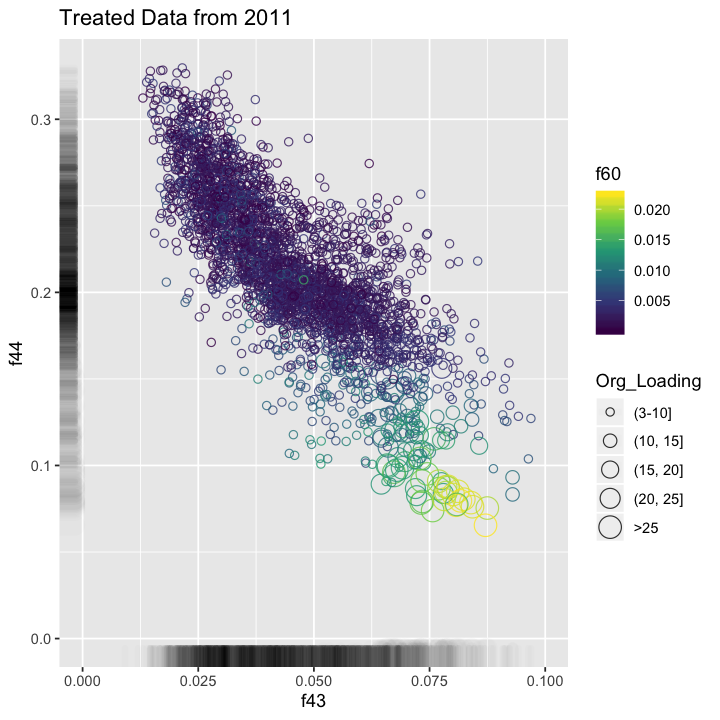

In [128]:
chosen_yr = 2011

f43_vs_f44 = org_mx  %>% 
            filter(year==chosen_yr)  %>% 
            filter(Org>3, f60>0)  %>%
            ggplot(aes(x=f43, y=f44, size=Org_Loading)) + 
            geom_point(shape=1, alpha=0.8, aes(color=f60)) + ylim(c(0, 0.33)) + xlim(c(0, 0.10)) +
            ggtitle(paste("Treated Data from", chosen_yr)) +
            scale_colour_viridis_c() +  scale_shape(solid = FALSE) + 
            geom_rug(alpha=0.01)

f43_vs_f44

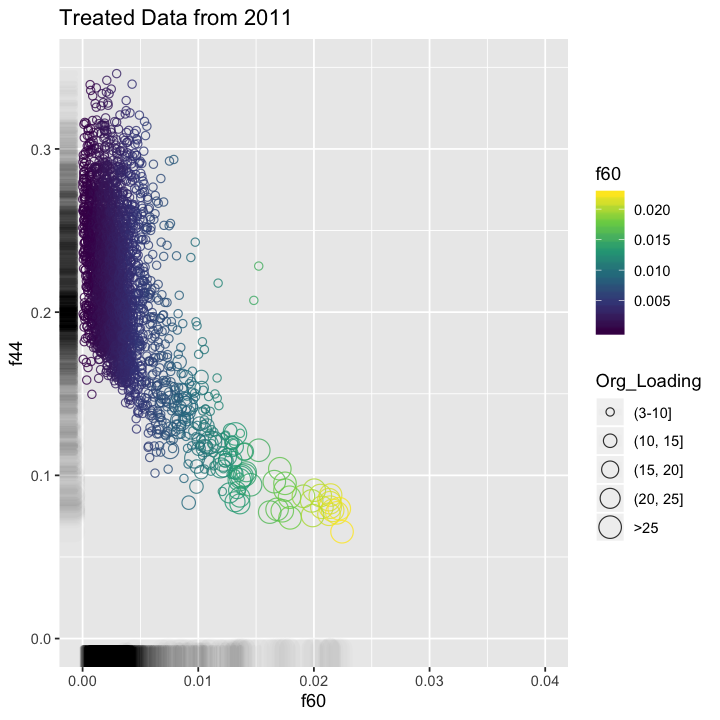

In [131]:
f60_vs_f44 = org_mx  %>% 
    filter(year==chosen_yr)  %>% 
    filter(Org>3, f60>0)  %>%
    ggplot(aes(x=f60, y=f44, size=Org_Loading)) + 
    geom_point(shape=1, alpha=0.8, aes(color=f60)) + ylim(c(0, 0.35)) + xlim(c(0, 0.04)) +
    ggtitle(paste("Treated Data from", chosen_yr)) +
    scale_colour_viridis_c() + 
    geom_rug(alpha=0.01)

f60_vs_f44

In [137]:
options(repr.plot.width=12, repr.plot.height=6)
final_fig = ggarrange(f43_vs_f44 + theme(legend.position = "none"), f60_vs_f44, ncol = 2, nrow = 1, widths=c(1.45, 1.9))

final_fig  %>% ggsave(filename=paste(chosen_yr, "_triangle_plot.png"), width=12, height=6)

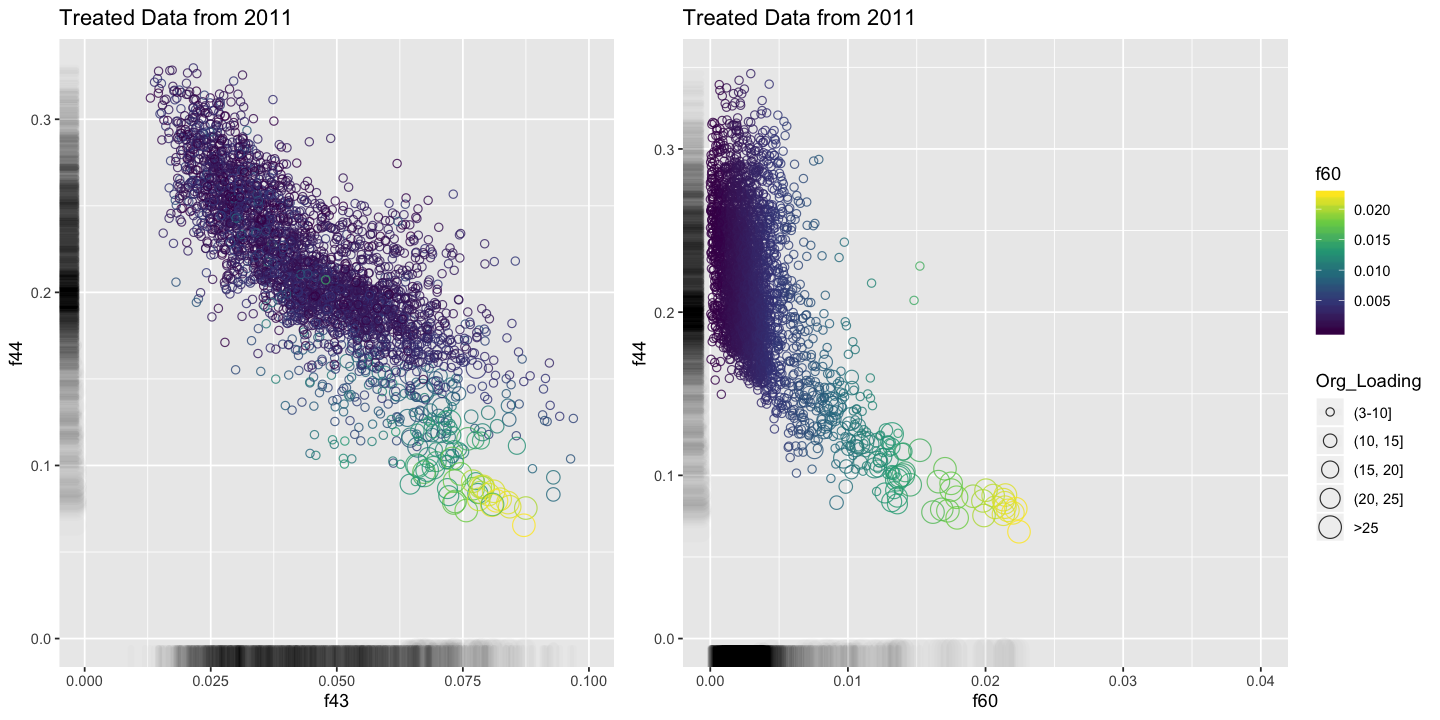

In [138]:
final_fig